In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
import geopandas
import geoplot
import geopandas
import pycountry
from iso3166 import countries
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 1000

ModuleNotFoundError: No module named 'geoplot'

In [2]:
import sys
sys.executable

'/anaconda3/bin/python'

In [3]:
# Dynamic parameters
data_dir  = '../data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))

print(trend_file)

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

#Create place to save diagrams
image_dir = './images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

trend_2020-02-15.csv


## Geoplotting

In [ ]:
shapefile = '../data/countries_110m/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = geopandas.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']

#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

In [ ]:
geolocator = Nominatim(timeout=3)
def geolocate(city=None, country=None):
    '''
    Inputs city and country, or just country. Returns the lat/long coordinates of 
    either the city if possible, if not, then returns lat/long of the center of the country.
    '''
    # If the city exists,
    if city != None:
        try:
            # To geolocate the city and country
            loc = geolocator.geocode(str(city + ',' + country))
            return (loc.latitude, loc.longitude)
        except:
            return np.nan        
    else:
        try:
            # Geolocate the center of the country
            loc = geolocator.geocode(country)
            return (loc.latitude, loc.longitude)
        except:
            return np.nan
        
def get_code(country):
#     try:
        return countries.get(country)
#     except:
#         print(country)
#         return ''
    
def plot_world(world):  
    # Remove antartica
    world = world[(world.country!="Antarctica")]
    world = world.to_crs({'init': 'epsg:3395'})
    
    fig, ax = plt.subplots(figsize=(20,20)) # Set Size
    
    ax.set_title("World Map View");
    ax.axis(False) # Turn off axis
    
    world.plot(ax=ax)

merged = country_df.merge(gdf)

In [ ]:
agg_df['country'] = agg_df.country.replace('Mainland China', 'china')

country_df = pd.DataFrame([])

country_df['country'] = agg_df.country.unique()

lats = []
longs = []
codes = []
for c in country_df['country']:
    lat, long = geolocate(country=c.lower())
    lats.append(lat)
    longs.append(long)
    codes.append(get_code(c))
    

country_df['lat'] = pd.Series(lats)
country_df['long'] = pd.Series(longs)
country_df['country_code'] = pd.Series(codes)

In [1]:
# agg_df

## Geomapping

In [5]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)

In [50]:
# ! pip install descartes

In [98]:

def plot_world(world):  
    # Remove antartica
    world = world[(world.name!="Antarctica")]
#     world = world.to_crs({'init': 'epsg:3395'})
    
    fig, ax = plt.subplots(figsize=(20,20)) # Set Size
    
    ax.set_title("World Map View");
    ax.axis(False) # Turn off axis
    
    world.plot(ax=ax, cmap='Reds')

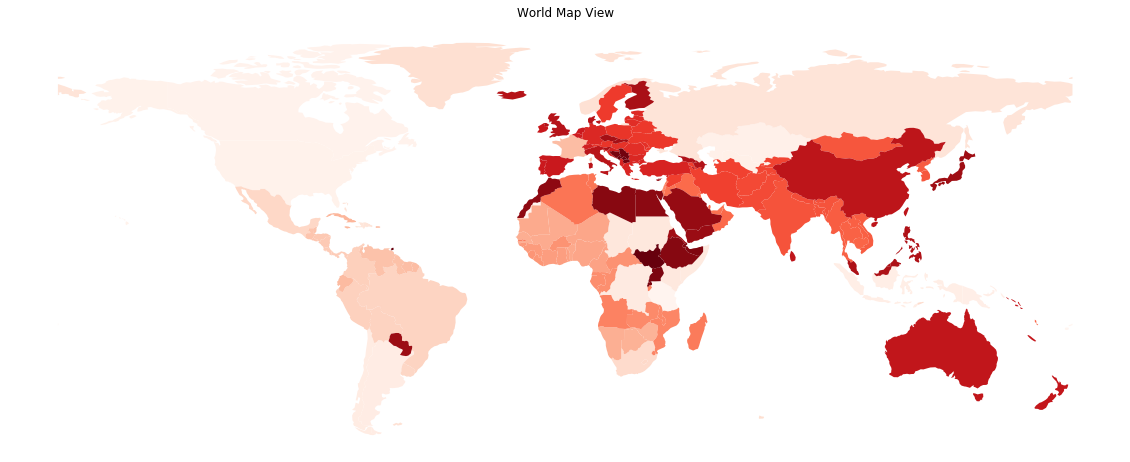

In [99]:
plot_world(world)

In [103]:
#Merge dataframes gdf and df_2016.
merged = world.merge(agg_df)

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False